In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Functions

## Import Data

In [13]:
def import_data():
    data = pd.read_csv('C:/Dropbox/Variance/UNSW/ZZSC5836/raw_data/iris.data', sep = ',', header = None)
    data = data.values
    data[:,4] = np.where(data[:,4] == 'Iris-setosa', 1, np.where(data[:,4] == 'Iris-versicolor', 2, 3))
    return data

## Basic Stats

In [14]:
def mean_sd_col(data):
    mean = data.mean(0)
    sd = data.std(0)
    return mean, sd

def class_dist(data, num_classes):
    for i in range(num_classes):
        placeholder[i] = np.count_nonzero(data == i+1)

## Histograms

In [15]:
def hist_plot(name, data):
    plt.figure()
    plt.hist(data)
    plt.title(name)
    plt.savefig(name+'.png', dpi = 500)

## Dataset Splitting

In [16]:
def data_split_random(data_x, data_y, portion):
    order = np.random.permutation(len(data_x))
    index = int(portion*len(data_x))
    x_train = data_x[order[:index]]
    x_test = data_x[order[index:]]
    y_train = data_y[order[:index]]
    y_test =  data_y[order[index:]]
    return x_train, x_test, y_train, y_test

def data_split_nonrandom(data_x, data_y, portion):
    index = int(portion*len(data_x))
    x_train = data_x[:index]
    x_test = data_x[index:]
    y_train = data_y[:index]
    y_test =  data_y[index:]
    return x_train, x_test, y_train, y_test    
    

## Feature Subset

In [17]:
def feature_subset(feature, x_train):
    x_train_sub = x_train[:,feature]
    return x_train_sub

## Binary Class

In [18]:
def binary_class(data):
    subset = data[data[:,4]<3]
    subset_x = subset[:,:4].astype(float)
    subset_y = subset[:, 4]
    sub_x_train, sub_x_test, sub_y_train, sub_y_test = data_split_random(subset_x,subset_y, 0.6)
    sub_train = np.hstack((sub_x_train, sub_y_train[:,np.newaxis]))
    sub_test = np.hstack((sub_x_test, sub_y_test[:,np.newaxis]))
    np.savetxt('binary_iristrain.txt',sub_train)
    np.savetxt('binary_iristest.txt',sub_test)
    return sub_train, sub_test

## Normalization

In [19]:
def minmaxnormal(data_x):
    min_x = data_x.min(0)
    max_x = data_x.max(0)
    data_scaled = (data_x-min_x)/(max_x-min_x)
    return data_scaled

# Main / Results

In [20]:
# Q1 : The import_data function has both the import and replace tasks combined

iris = import_data()
iris_x = iris[:,:4].astype(float)
iris_y = iris[:, 4]

In [21]:
### Q2
    
mean_x, sd_x = mean_sd_col(iris_x)
print('Column Means are ', mean_x)
print('Column Standard Deviations are ', sd_x)

Column Means are  [5.84333333 3.054      3.75866667 1.19866667]
Column Standard Deviations are  [0.82530129 0.43214658 1.75852918 0.76061262]


In [22]:
### Q3
    
num_classes = 3
placeholder = [None]*num_classes

def class_dist(data, num_classes):
    for i in range(num_classes):
        placeholder[i] = np.count_nonzero(data == i+1) 
    
class_dist(iris_y, num_classes)

print(f"There are {placeholder[0]} Iris_setosa samples")
print(f"There are {placeholder[1]} Iris_versicolor samples")
print(f"There are {placeholder[2]} Iris_virginica samples")

There are 50 Iris_setosa samples
There are 50 Iris_versicolor samples
There are 50 Iris_virginica samples


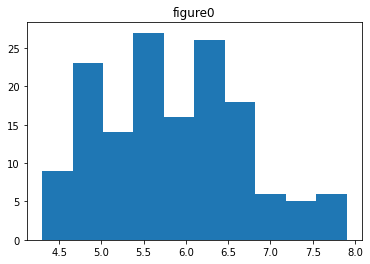

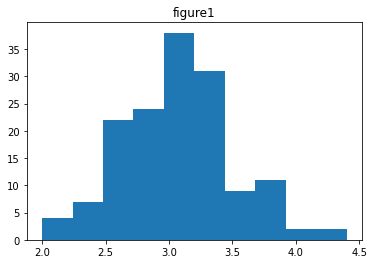

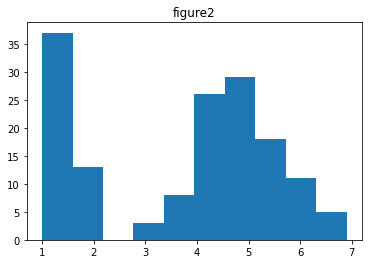

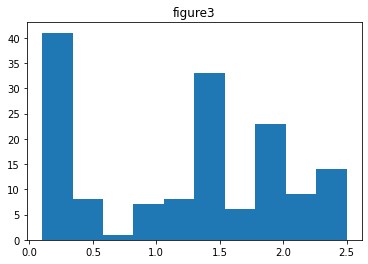

In [23]:
### Q4 
    
for i in range(len(iris_x[0])):
    name = 'figure'+str(i)
    data = iris_x[:,i]
    hist_plot(name,data)

In [24]:
### Q5

portion = 0.6

#i Random

r_x_train, r_x_test, r_y_train, r_y_test = data_split_random(iris_x, iris_y, portion)

#ii Deterministic    

d_x_train, d_x_test, d_y_train, d_y_test = data_split_nonrandom(iris_x, iris_y, portion)

Column Means for train are  [5.79444444 3.01111111 3.71111111 1.18333333]
Column Standard Deviations for train are  [0.80503431 0.45763752 1.74435244 0.7483686 ]
Column Means for test are  [5.91666667 3.11833333 3.83       1.22166667]
Column Standard Deviations for test are  [0.84954236 0.38187767 1.77719817 0.77805134]
There are 30 Iris_setosa samples in the Train set
There are 29 Iris_versicolor samples in the Train set
There are 31 Iris_virginica samples in the Train set
There are 20 Iris_setosa samples in the Test set
There are 21 Iris_versicolor samples in the Test set
There are 19 Iris_virginica samples in the Test set


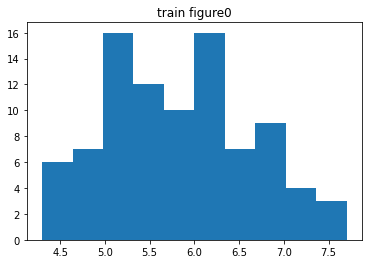

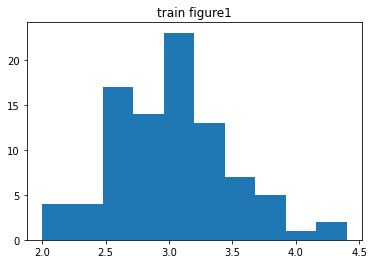

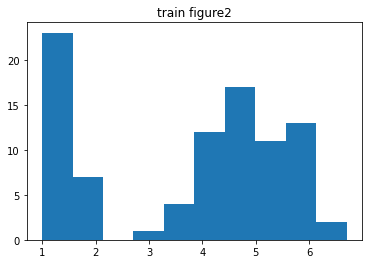

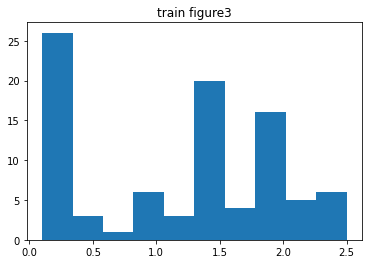

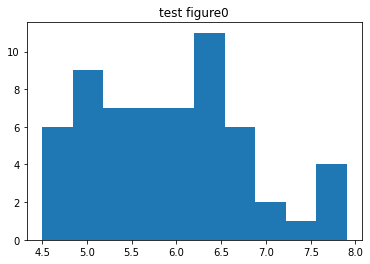

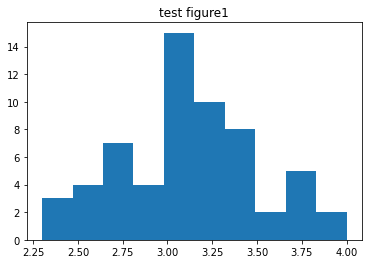

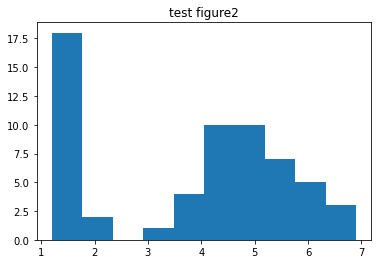

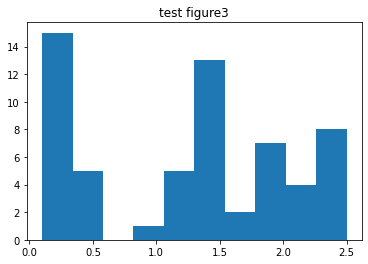

In [25]:
### Q6 with random set

mean_train, sd_train = mean_sd_col(r_x_train)
print('Column Means for train are ', mean_train)
print('Column Standard Deviations for train are ', sd_train)

mean_test, sd_test = mean_sd_col(r_x_test)
print('Column Means for test are ', mean_test)
print('Column Standard Deviations for test are ', sd_test)

class_dist(r_y_train, num_classes)

print(f"There are {placeholder[0]} Iris_setosa samples in the Train set")
print(f"There are {placeholder[1]} Iris_versicolor samples in the Train set")
print(f"There are {placeholder[2]} Iris_virginica samples in the Train set")

class_dist(r_y_test, num_classes)

print(f"There are {placeholder[0]} Iris_setosa samples in the Test set")
print(f"There are {placeholder[1]} Iris_versicolor samples in the Test set")
print(f"There are {placeholder[2]} Iris_virginica samples in the Test set")

for i in range(len(r_x_train[0])):
    name = 'train figure'+str(i)
    data = r_x_train[:,i]
    hist_plot(name,data)
    
for i in range(len(r_x_test[0])):
    name = 'test figure'+str(i)
    data = r_x_test[:,i]
    hist_plot(name,data)


In [26]:
### Q7
subset_1 = feature_subset(1, r_x_train)[:,np.newaxis]

Column Means for train are  [5.49333333 3.16       2.85166667 0.78333333]
Column Standard Deviations for train are  [0.60051829 0.50305732 1.43811122 0.56485003]
Column Means for test are  [5.4375 2.995  2.8775 0.7875]
Column Standard Deviations for test are  [0.69017661 0.40617115 1.44594044 0.56133212]
There are 30 Iris_setosa samples in the Train set
There are 30 Iris_versicolor samples in the Train set
There are 0 Iris_virginica samples in the Train set
There are 20 Iris_setosa samples in the Test set
There are 20 Iris_versicolor samples in the Test set
There are 0 Iris_virginica samples in the Test set


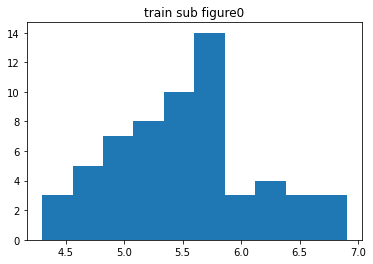

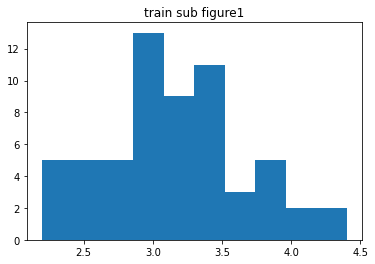

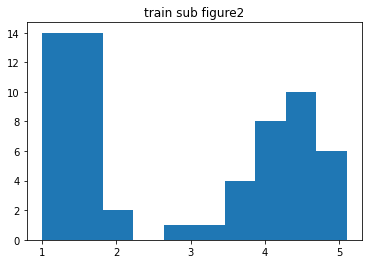

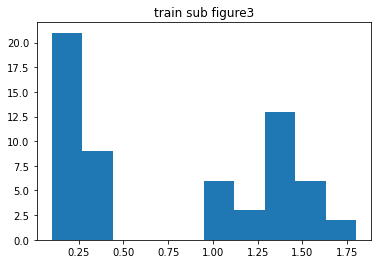

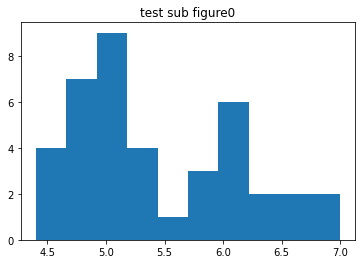

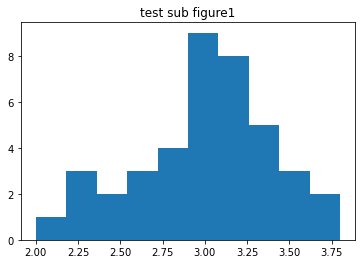

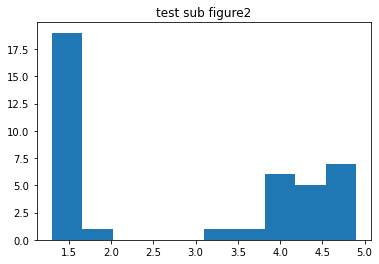

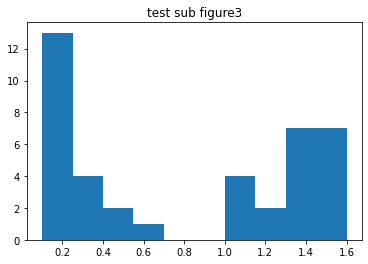

In [27]:
### Q8

sub_train, sub_test = binary_class(iris)
sub_x_train = sub_train[:,:4].astype(float)
sub_y_train = sub_train[:, 4]
sub_x_test = sub_test[:,:4].astype(float)
sub_y_test = sub_test[:, 4]


mean_train, sd_train = mean_sd_col(sub_x_train)
print('Column Means for train are ', mean_train)
print('Column Standard Deviations for train are ', sd_train)

mean_test, sd_test = mean_sd_col(sub_x_test)
print('Column Means for test are ', mean_test)
print('Column Standard Deviations for test are ', sd_test)

class_dist(sub_y_train, num_classes)

print(f"There are {placeholder[0]} Iris_setosa samples in the Train set")
print(f"There are {placeholder[1]} Iris_versicolor samples in the Train set")
print(f"There are {placeholder[2]} Iris_virginica samples in the Train set")

class_dist(sub_y_test, num_classes)

print(f"There are {placeholder[0]} Iris_setosa samples in the Test set")
print(f"There are {placeholder[1]} Iris_versicolor samples in the Test set")
print(f"There are {placeholder[2]} Iris_virginica samples in the Test set")

for i in range(len(sub_x_train[0])):
    name = 'train sub figure'+str(i)
    data = sub_x_train[:,i]
    hist_plot(name,data)
    
for i in range(len(sub_x_test[0])):
    name = 'test sub figure'+str(i)
    data = sub_x_test[:,i]
    hist_plot(name,data)

In [28]:
### Q9 
    
normal_x = minmaxnormal(iris_x)